In [ ]:
LEVEL3
TASK1:PREDICTIVE MODELING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('cognifyz dataset.csv')
df
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)
df['Has Table Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [5]:
X = df[['Average Cost for two', 'Restaurant Name Length', 'Address Length', 'Has Table Booking', 'Has Online Delivery']]
y = df['Aggregate rating']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [8]:
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [9]:
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [11]:
linear_reg_mse, linear_reg_r2 = evaluate_model(linear_reg, X_test, y_test)
decision_tree_mse, decision_tree_r2 = evaluate_model(decision_tree_reg, X_test, y_test)
random_forest_mse, random_forest_r2 = evaluate_model(random_forest_reg, X_test, y_test)

print(f'Linear Regression - MSE: {linear_reg_mse}, R-squared: {linear_reg_r2}')
print(f'Decision Tree - MSE: {decision_tree_mse}, R-squared: {decision_tree_r2}')
print(f'Random Forest - MSE: {random_forest_mse}, R-squared: {random_forest_r2}')

Linear Regression - MSE: 2.09781715516153, R-squared: 0.07833185313490243
Decision Tree - MSE: 3.2696037821966395, R-squared: -0.4364882332598976
Random Forest - MSE: 2.011758550763726, R-squared: 0.11614138016730635


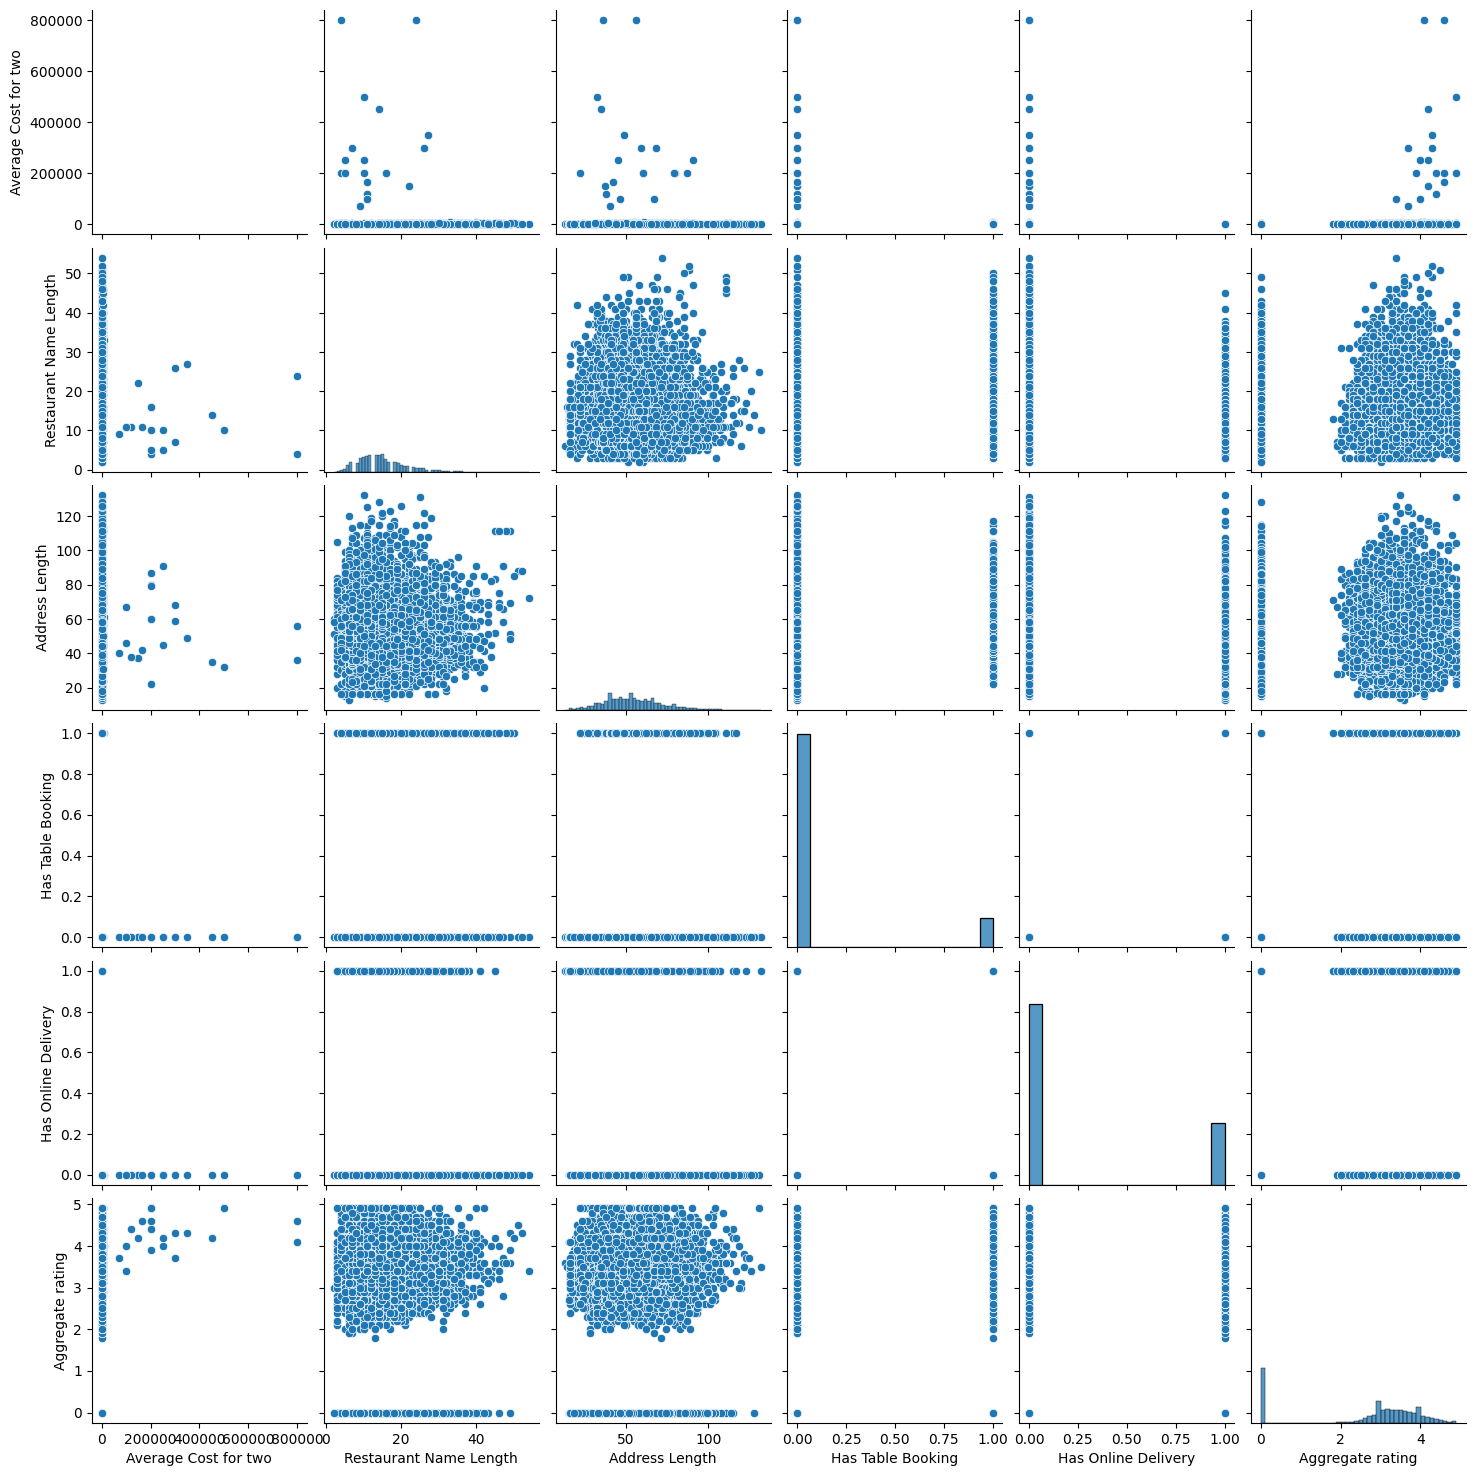

In [12]:
sns.pairplot(df[['Average Cost for two', 'Restaurant Name Length', 'Address Length', 'Has Table Booking', 'Has Online Delivery', 'Aggregate rating']])
plt.show()

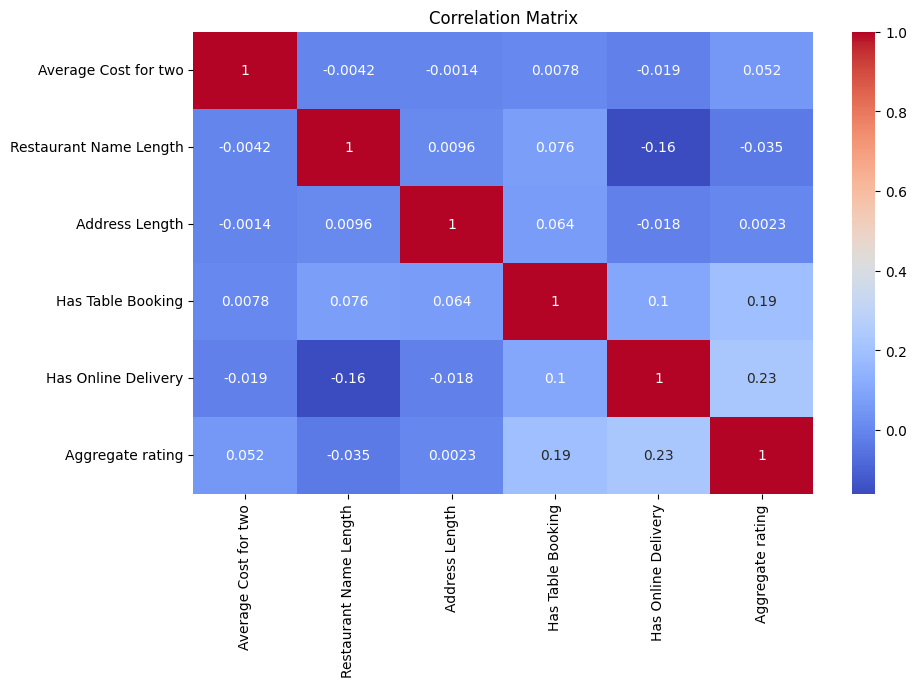

In [13]:
corr = df[['Average Cost for two', 'Restaurant Name Length', 'Address Length', 'Has Table Booking', 'Has Online Delivery', 'Aggregate rating']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
y_pred_linear = linear_reg.predict(X_test)
y_pred_decision_tree = decision_tree_reg.predict(X_test)
y_pred_random_forest = random_forest_reg.predict(X_test)

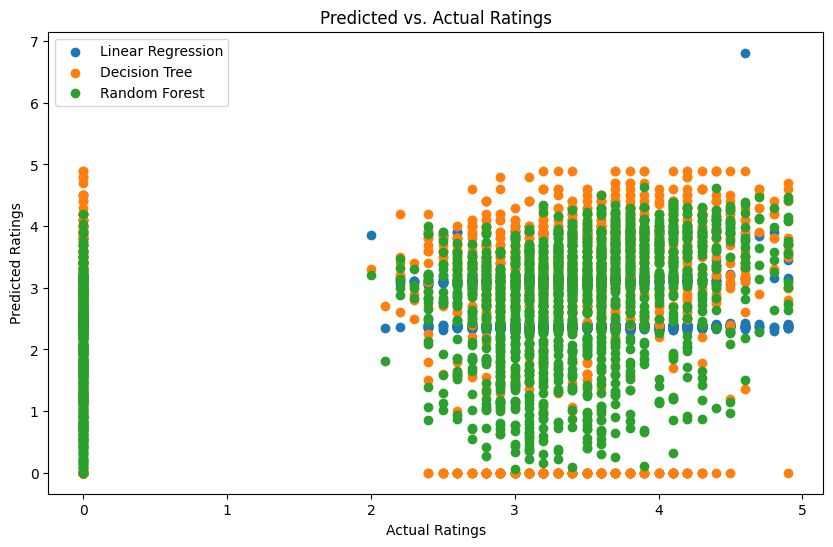

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, label='Linear Regression')
plt.scatter(y_test, y_pred_decision_tree, label='Decision Tree')
plt.scatter(y_test, y_pred_random_forest, label='Random Forest')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.title('Predicted vs. Actual Ratings')
plt.show()

In [ ]:
TASK2:CUSTOMER PREFERENCE ANALYSIS


In [19]:
df.head(5)
df.describe()
cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

<ipython-input-20-8674dc5effb2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='viridis')


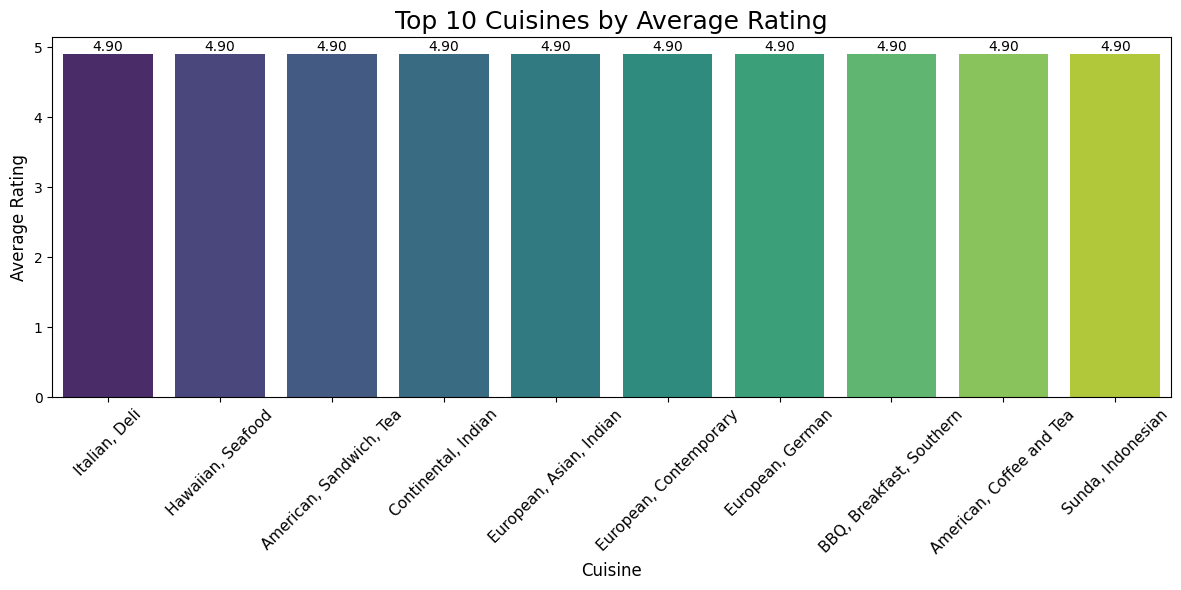

In [20]:
top_cuisines = cuisine_rating.head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.title('Top 10 Cuisines by Average Rating', fontsize=18)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.tight_layout()
plt.show()

In [21]:
cuisine_votes = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

<ipython-input-22-c7fad3c03814>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='viridis')


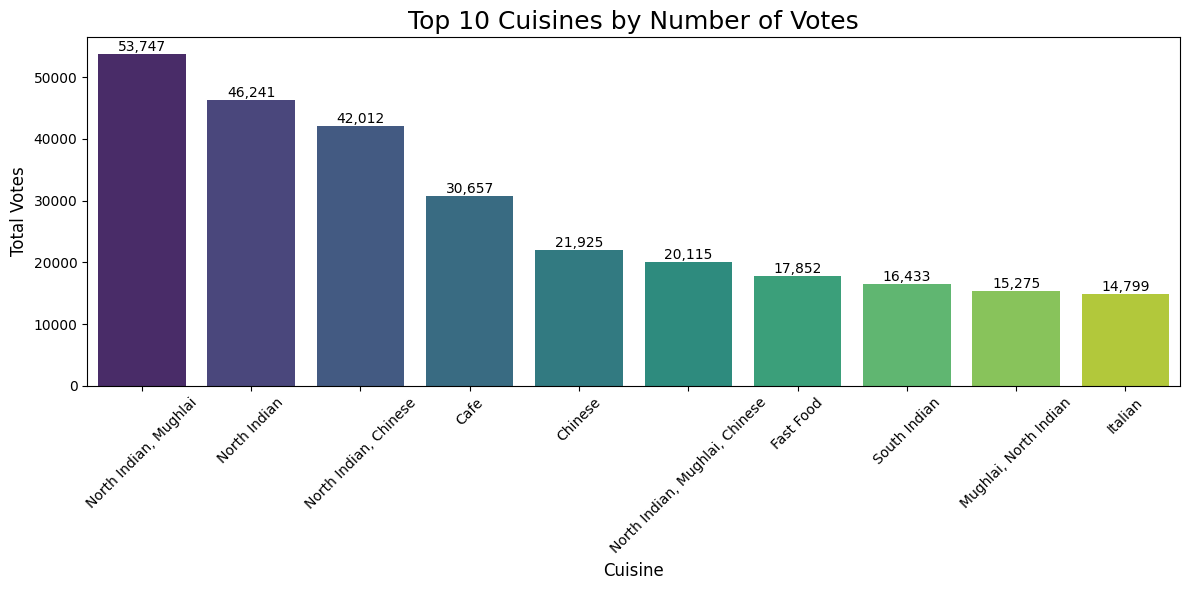

In [22]:
top_cuisines = cuisine_votes.head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.title('Top 10 Cuisines by Number of Votes', fontsize=18)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [23]:
cuisine_mean_rating = df.groupby('Cuisines')['Aggregate rating'].mean()

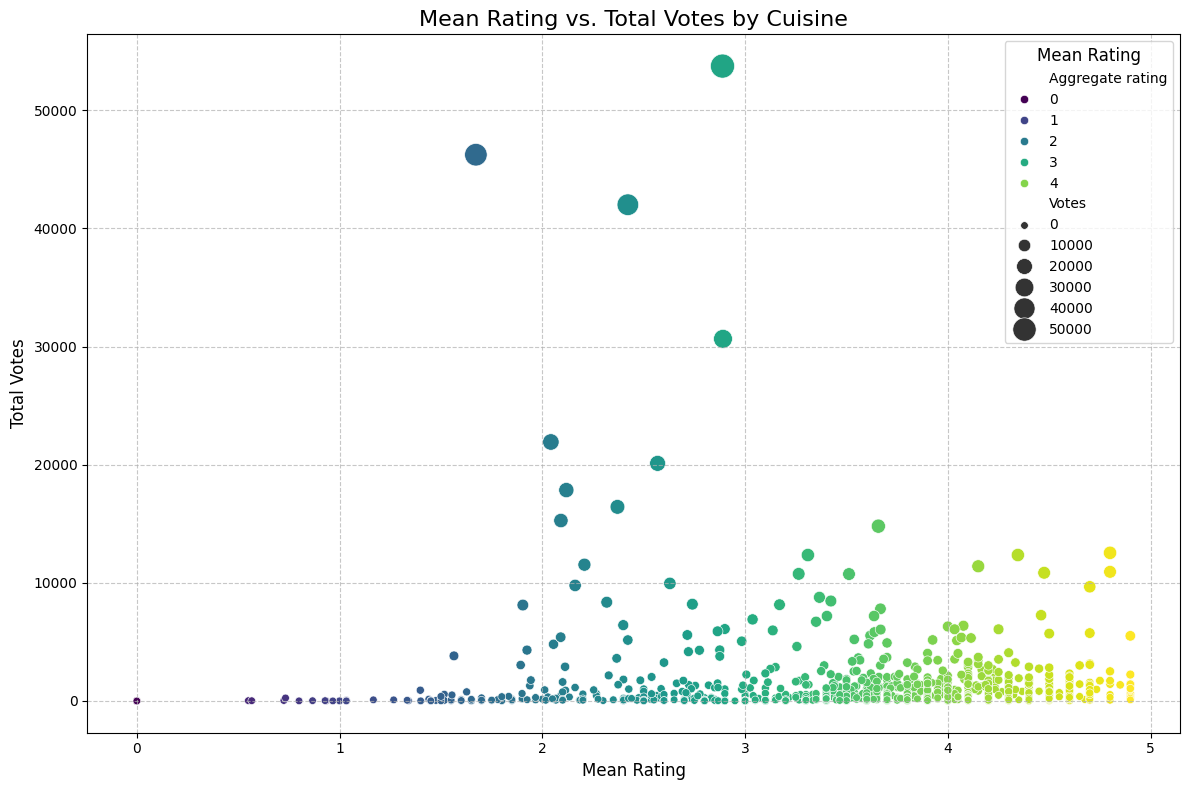

In [24]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=cuisine_mean_rating, y=cuisine_votes, hue=cuisine_mean_rating, palette='viridis', size=cuisine_votes, sizes=(30, 300))
plt.title('Mean Rating vs. Total Votes by Cuisine', fontsize=16)
plt.xlabel('Mean Rating', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.legend(title='Mean Rating', fontsize=10, title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
price_range_rating = df.groupby('Price range')['Aggregate rating'].mean()

<ipython-input-26-46a2b1d914ac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_price_range_rating.index, y=sorted_price_range_rating.values, palette='viridis')


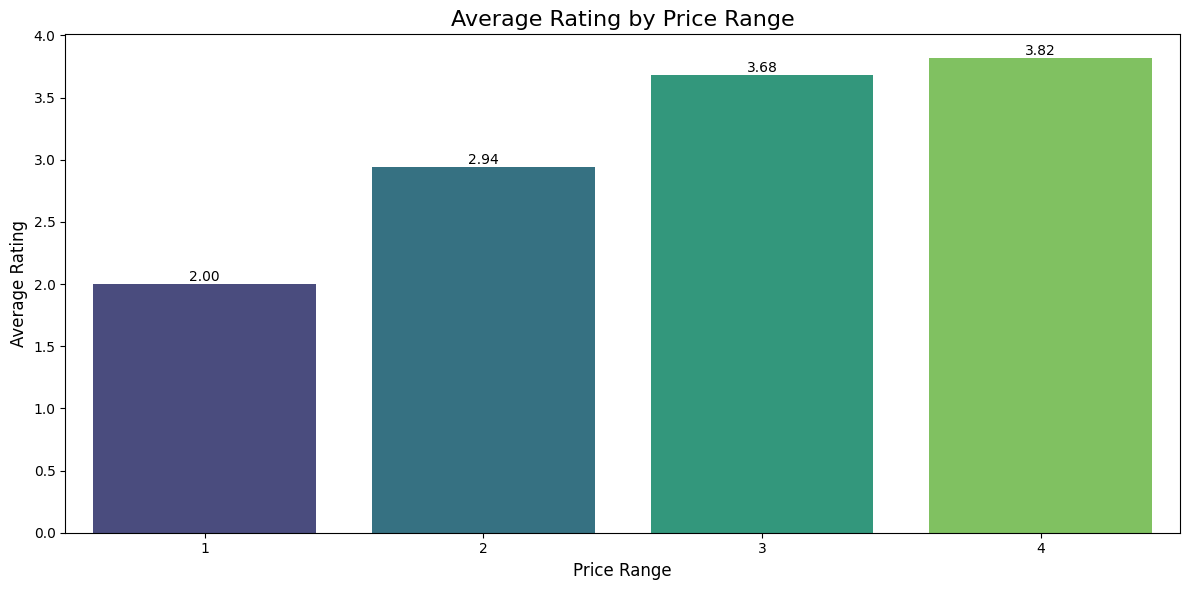

In [26]:
sorted_price_range_rating = price_range_rating.sort_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sorted_price_range_rating.index, y=sorted_price_range_rating.values, palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.title('Average Rating by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
table_booking_rating = df.groupby('Has Table booking')['Aggregate rating'].mean()

<ipython-input-28-2ecdfe02343c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_table_booking_rating.index, y=sorted_table_booking_rating.values, palette='viridis')


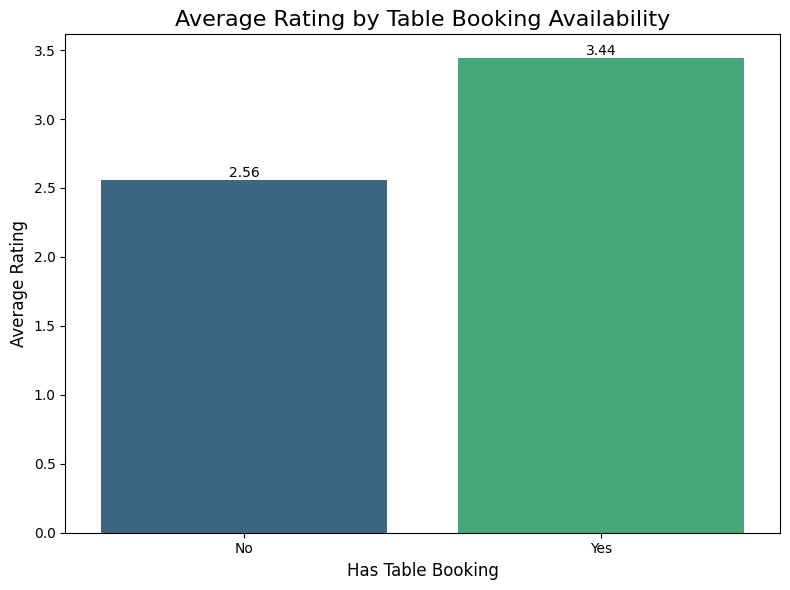

In [28]:
sorted_table_booking_rating = table_booking_rating.sort_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sorted_table_booking_rating.index, y=sorted_table_booking_rating.values, palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.title('Average Rating by Table Booking Availability', fontsize=16)
plt.xlabel('Has Table Booking', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.tight_layout()
plt.show()

In [29]:
online_delivery_rating = df.groupby('Has Online delivery')['Aggregate rating'].mean()

<ipython-input-30-29fb591e9265>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_online_delivery_rating.index, y=sorted_online_delivery_rating.values, palette='viridis')


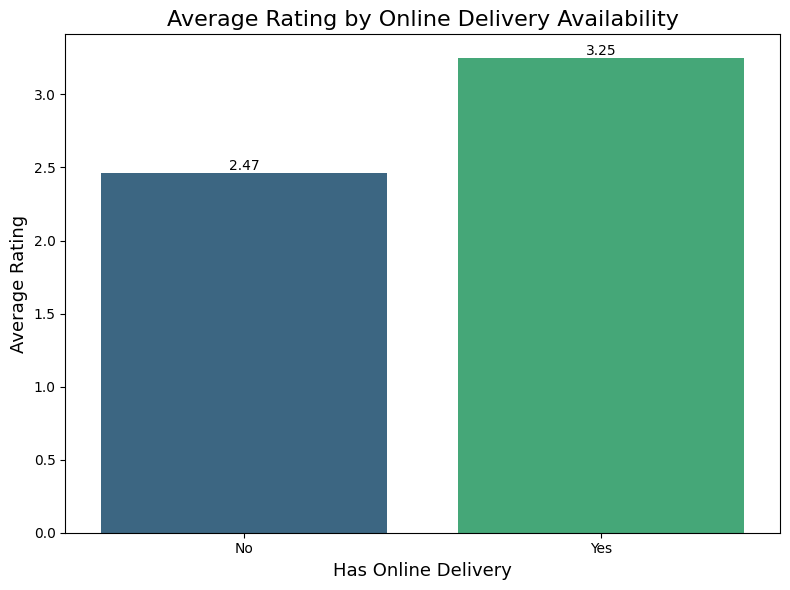

In [30]:
sorted_online_delivery_rating = online_delivery_rating.sort_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sorted_online_delivery_rating.index, y=sorted_online_delivery_rating.values, palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.title('Average Rating by Online Delivery Availability', fontsize=16)
plt.xlabel('Has Online Delivery', fontsize=13)
plt.ylabel('Average Rating', fontsize=13)
plt.tight_layout()
plt.show()

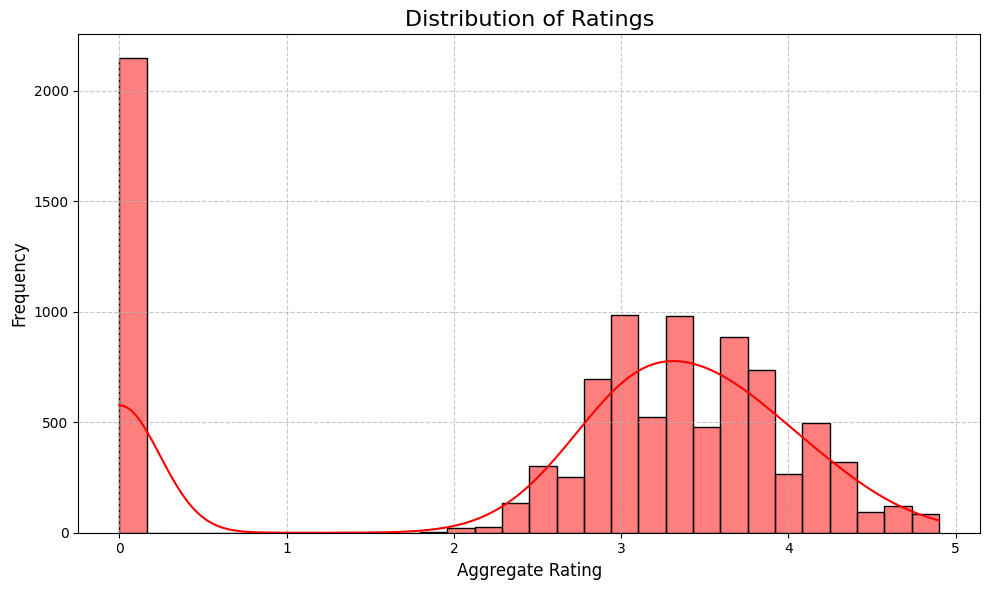

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=30, kde=True, color='red', edgecolor='black')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

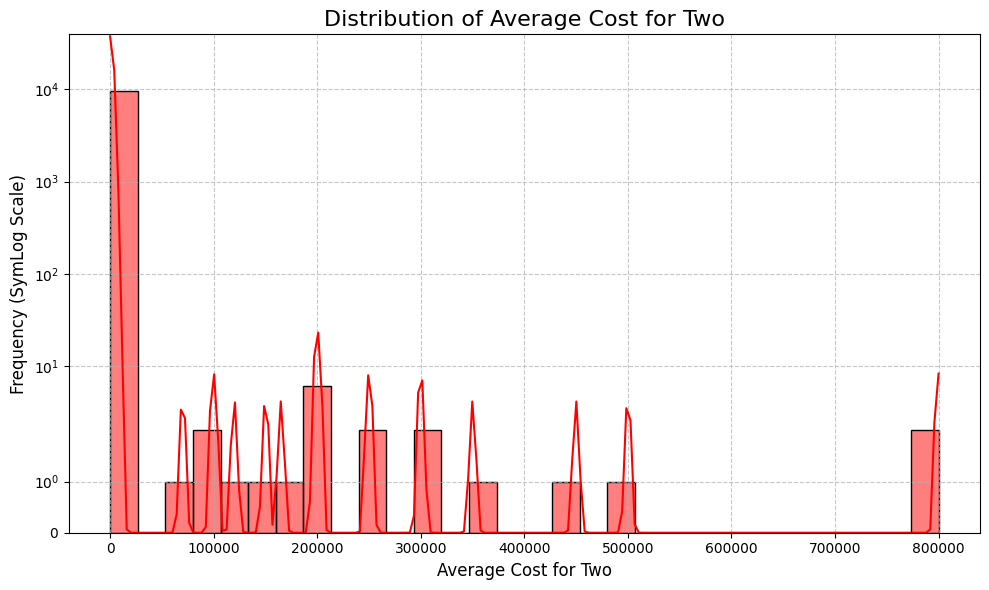

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Average Cost for two'], bins=30, kde=True, color='red', edgecolor='black')
ax.set_yscale('symlog')
plt.title('Distribution of Average Cost for Two', fontsize=16)
plt.xlabel('Average Cost for Two', fontsize=12)
plt.ylabel('Frequency (SymLog Scale)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
TASK3:DATA VISUALIZATION


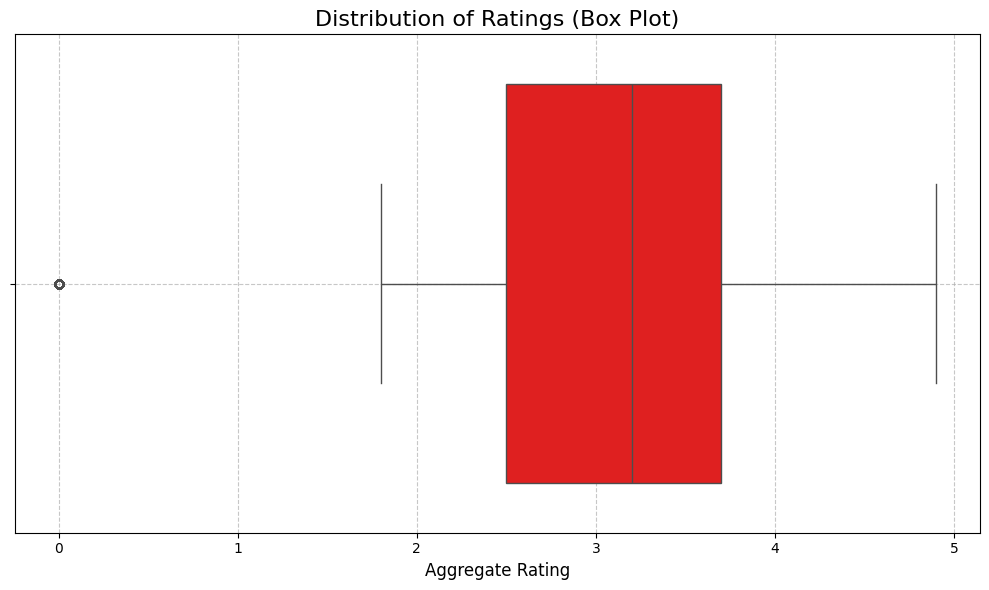

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df['Aggregate rating'], color='red')
plt.title('Distribution of Ratings (Box Plot)', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

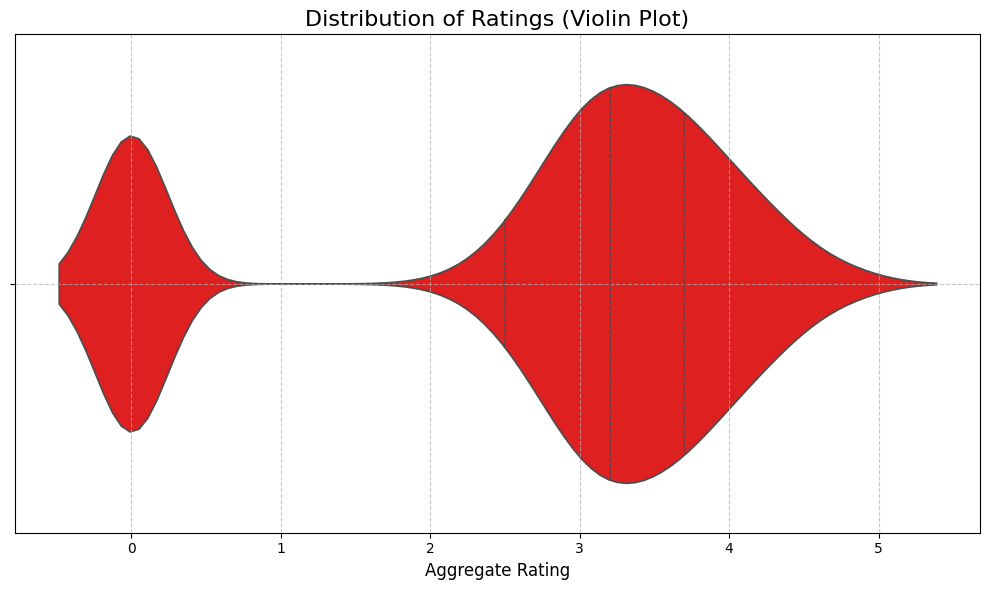

In [34]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x=df['Aggregate rating'], color='red', inner='quartiles')
plt.title('Distribution of Ratings (Violin Plot)', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
cuisine_avg_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)[:10]

<ipython-input-36-db3541387098>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_cuisine_avg_rating.index, y=sorted_cuisine_avg_rating.values, palette='viridis')


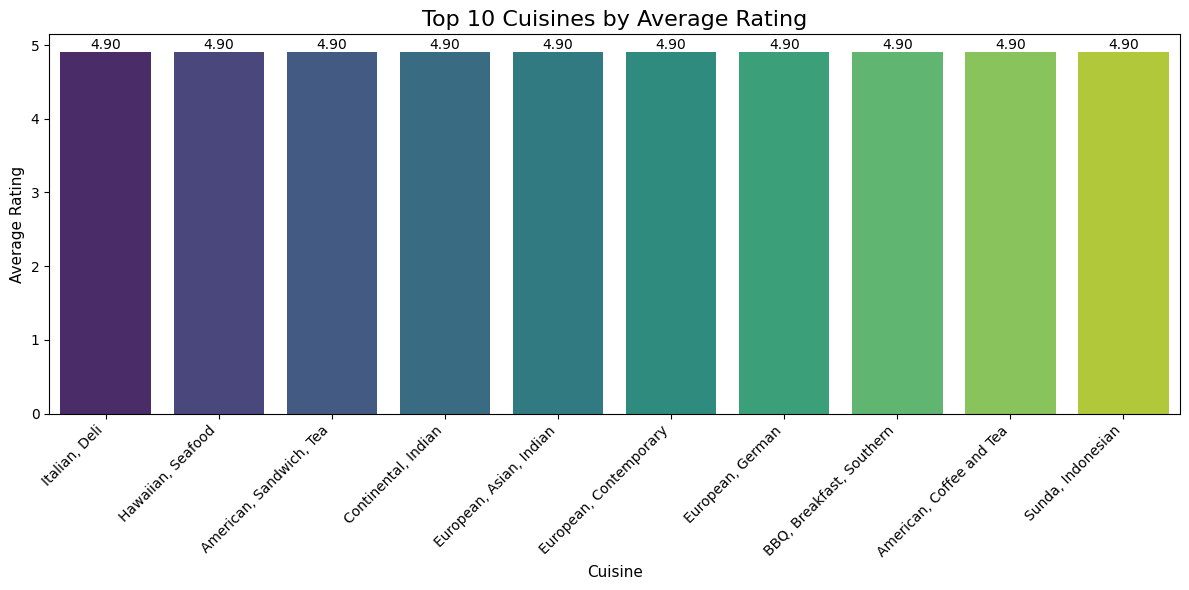

In [36]:
plt.figure(figsize=(12, 6))
sorted_cuisine_avg_rating = cuisine_avg_rating.sort_values(ascending=False).head(10)
ax = sns.barplot(x=sorted_cuisine_avg_rating.index, y=sorted_cuisine_avg_rating.values, palette='viridis')
plt.title('Top 10 Cuisines by Average Rating', fontsize=16)
plt.xlabel('Cuisine', fontsize=11)
plt.ylabel('Average Rating', fontsize=11)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

In [37]:
city_avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)[:10]

<ipython-input-38-3d7c99325de4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_city_avg_rating.index, y=sorted_city_avg_rating.values, palette='viridis')


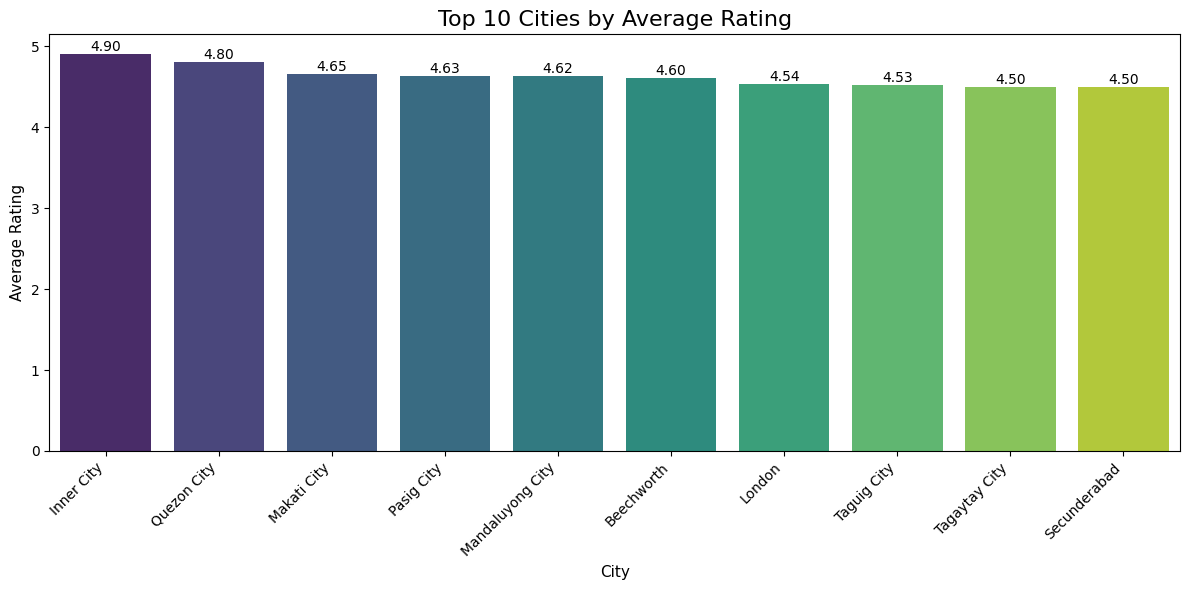

In [38]:
plt.figure(figsize=(12, 6))
sorted_city_avg_rating = city_avg_rating.sort_values(ascending=False).head(10)
ax = sns.barplot(x=sorted_city_avg_rating.index, y=sorted_city_avg_rating.values, palette='viridis')
plt.title('Top 10 Cities by Average Rating', fontsize=16)
plt.xlabel('City', fontsize=11)
plt.ylabel('Average Rating', fontsize=11)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

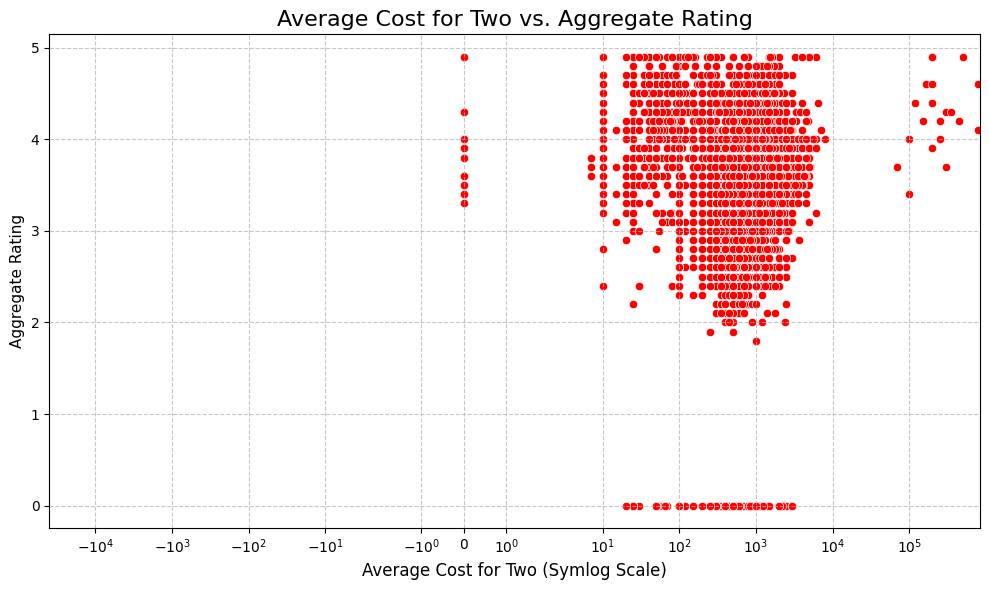

In [39]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df, color='red')
ax.set_xscale('symlog')
plt.title('Average Cost for Two vs. Aggregate Rating', fontsize=16)
plt.xlabel('Average Cost for Two (Symlog Scale)', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

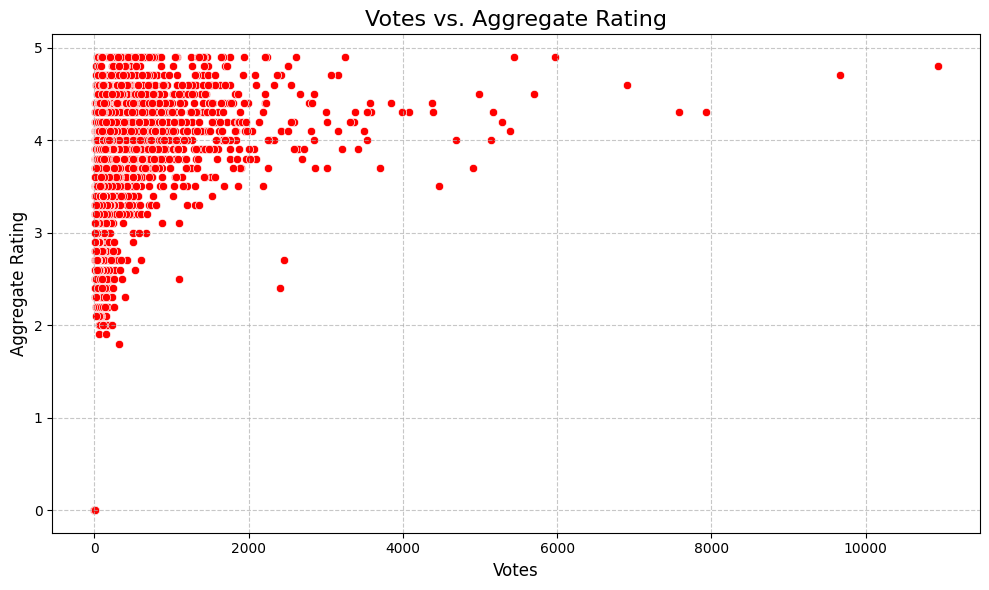

In [40]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Votes', y='Aggregate rating', data=df, color='red')
plt.title('Votes vs. Aggregate Rating', fontsize=16)
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
city_restaurant_count = df['City'].value_counts()[:10]

<ipython-input-42-11c51ed9c610>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_city_restaurant_count.index, y=sorted_city_restaurant_count.values, palette='viridis')


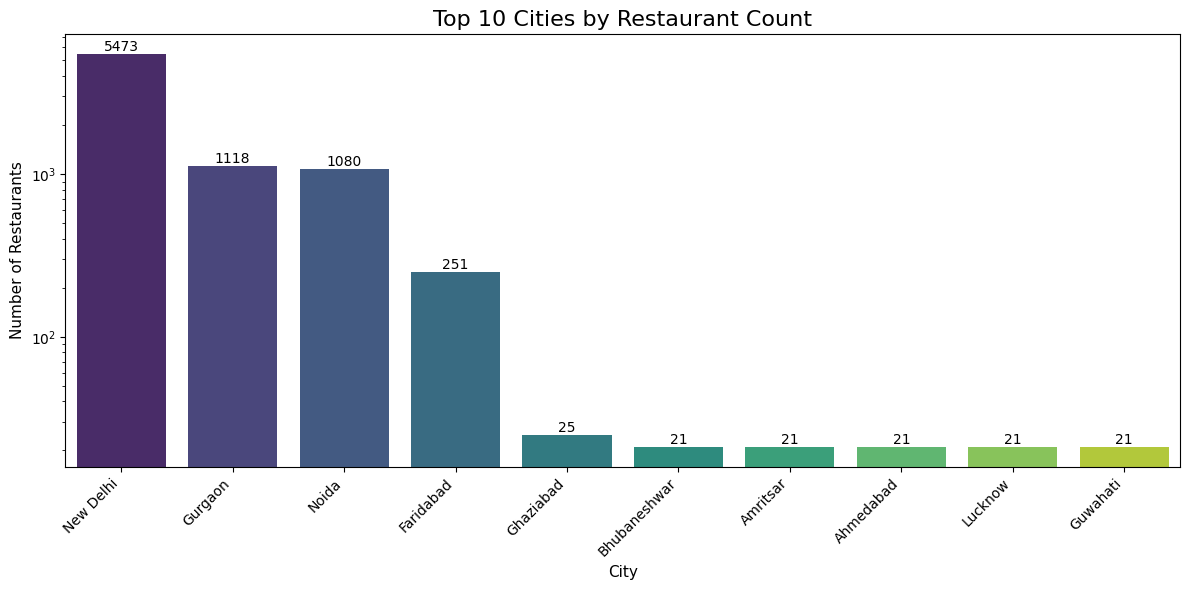

In [42]:
plt.figure(figsize=(12, 6))
sorted_city_restaurant_count = city_restaurant_count.sort_values(ascending=False).head(10)
ax = sns.barplot(x=sorted_city_restaurant_count.index, y=sorted_city_restaurant_count.values, palette='viridis')
ax.set_yscale('log')
plt.title('Top 10 Cities by Restaurant Count', fontsize=16)
plt.xlabel('City', fontsize=11)
plt.ylabel('Number of Restaurants', fontsize=11)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

In [43]:
online_delivery_count = df['Has Online delivery'].value_counts()

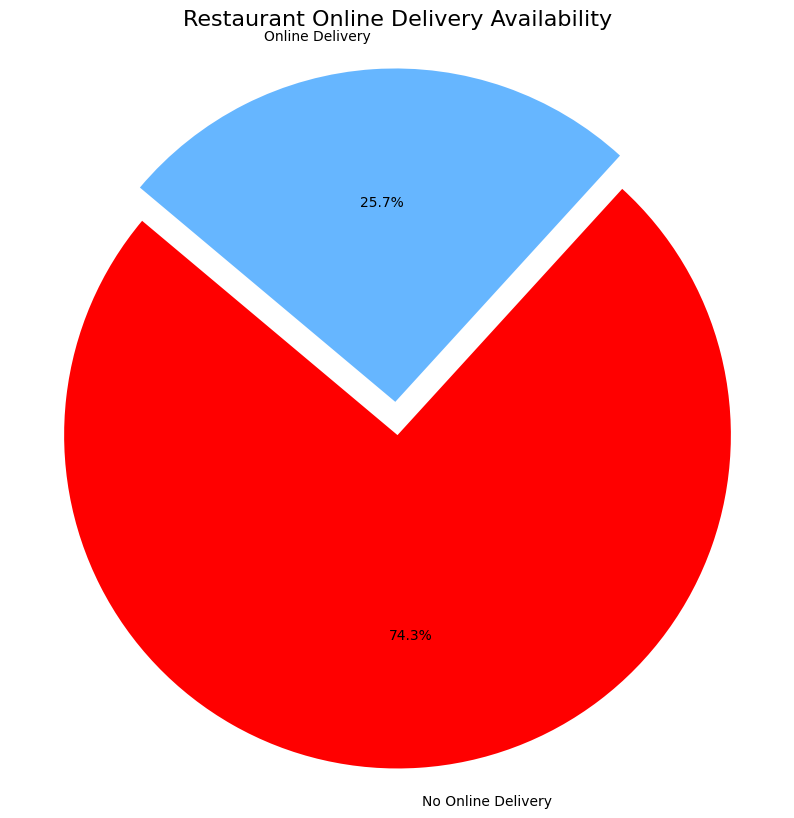

In [44]:
labels = ['No Online Delivery', 'Online Delivery']
colors = ['#ff0000', '#66b6ff']
explode = (0.1, 0)
plt.figure(figsize=(10, 10))
plt.pie(online_delivery_count, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Restaurant Online Delivery Availability', fontsize=16)
plt.axis('equal')
plt.show()

In [45]:
table_booking_count = df['Has Table booking'].value_counts()

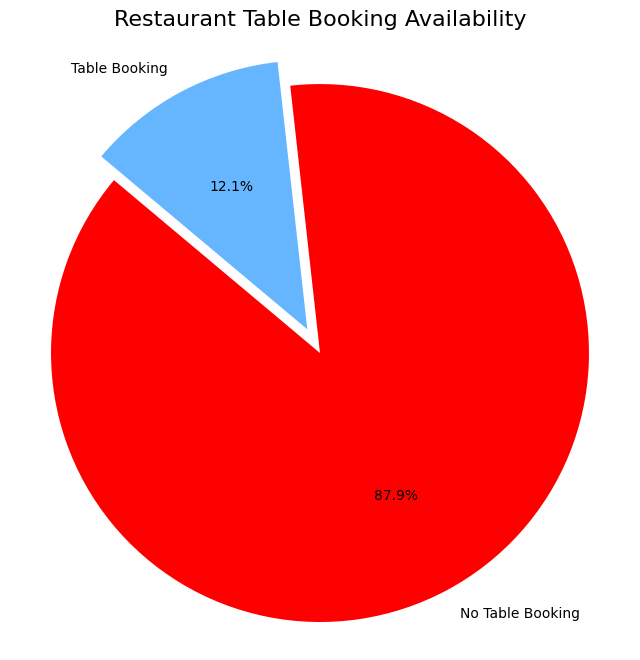

In [46]:
labels = ['No Table Booking', 'Table Booking']
colors = ['#ff0000', '#66b6ff']
explode = (0.1, 0)
plt.figure(figsize=(8, 8))
plt.pie(table_booking_count, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Restaurant Table Booking Availability', fontsize=16)
plt.axis('equal')
plt.show()